In [23]:
import flickrapi
from IPython.display import HTML, Image, display


In [7]:
FLICKR_KEY = '..'
FLICKR_SECRET = '..'

In [8]:
flickr = flickrapi.FlickrAPI(FLICKR_KEY, FLICKR_SECRET, format='parsed-json')


In [89]:
def flickr_url(photo, size='z'):
    '''
    helper function to return the download url.
    sizes options are detailed here 
    https://www.flickr.com/services/api/misc.urls.html
    '''
    url = 'http://farm{farm}.staticflickr.com/{server}/{id}_{secret}{size}.jpg'
    if size:
        size = '_' + size
    return url.format(size=size, **photo)

In [90]:
# api parameters are described here 
# https://www.flickr.com/services/api/flickr.photos.search.html

text='"red tassel-flower"'
res = flickr.photos.search(text=text, per_page='10', sort='relevance', privacy_filter=1,
                           content_type=1)


In [91]:
photos = res['photos']['photo']


In [92]:
photos_urls = [(photo['title'], flickr_url(photo)) for photo in photos]
photos_urls

[('Blood Red Tassel Flower',
  'http://farm4.staticflickr.com/3844/14234864100_ea145f5eb3_z.jpg'),
 ('Powderpuff',
  'http://farm8.staticflickr.com/7144/6829014325_c5137ca9a9_z.jpg'),
 ('прятки.  Calliandra "hide-and-seek"',
  'http://farm6.staticflickr.com/5288/5260831078_a6c93aee72_z.jpg'),
 ('Perky Red Puffballs',
  'http://farm9.staticflickr.com/8075/8441241637_ff0dc0befa_z.jpg'),
 ('Calliandra haematocephala',
  'http://farm1.staticflickr.com/147/382882344_fd76d8928e_z.jpg'),
 ('Calliandra haematocephala',
  'http://farm1.staticflickr.com/165/382880721_69844dd034_z.jpg'),
 ('Puffball and Bud',
  'http://farm9.staticflickr.com/8096/8519446011_e0f6ea08e8_z.jpg'),
 ('Calliandra haematocephala',
  'http://farm1.staticflickr.com/145/385439308_f8745d2a7c_z.jpg'),
 ('Florida 2012 017_1',
  'http://farm8.staticflickr.com/7010/6661463001_3521759248_z.jpg'),
 ('Calliandra haematocephala',
  'http://farm1.staticflickr.com/134/318323083_6ba5587a9f_z.jpg')]

In [93]:
# display the images
import matplotlib.pyplot as plt
from matplotlib.image import imread
import urllib


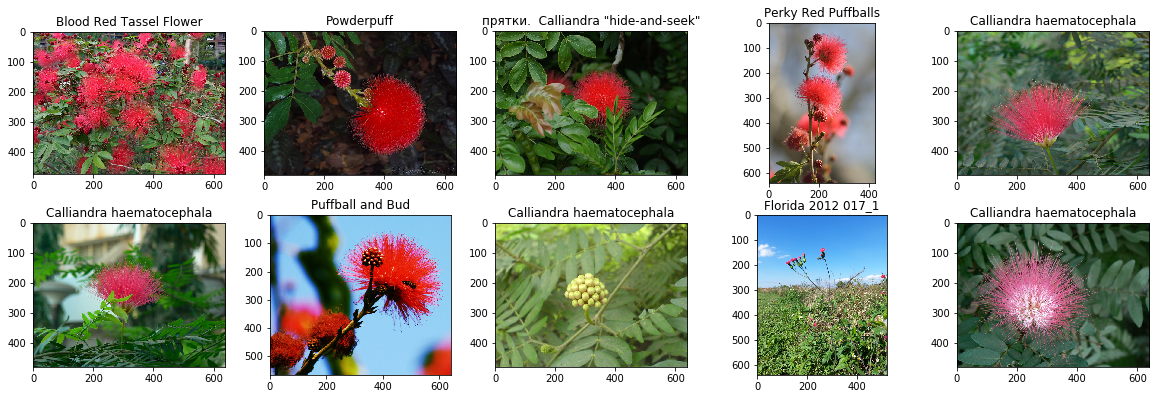

In [96]:
plt.figure(figsize=(20,10))
columns = 5

for i, (title, url) in enumerate(photos_urls):
    f = urllib.request.urlopen(url)
    img = imread(f, format='jpg')
    plt.subplot(len(photos_urls) / columns + 1, columns, i + 1)
    plt.title(title)
    plt.imshow(img)
    